Accuracy: 0.8375069560378409


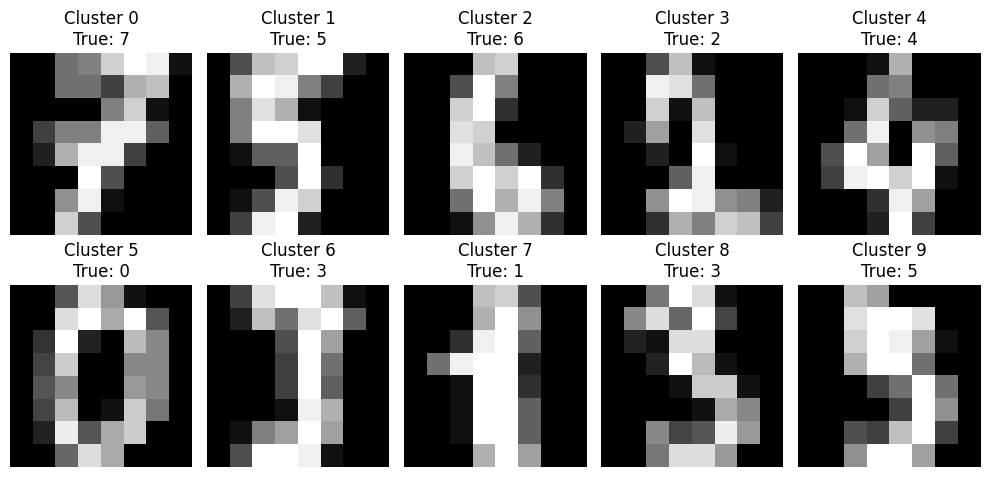

In [3]:
# handwritten digit clustering using GaussianMixture
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

# Load digit images and labels
digits = load_digits()
X, y = digits.data, digits.target

# Train Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X)
clusters = gmm.predict(X)

# Map each cluster to the most common true digit
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y[mask], keepdims=True)[0]

# Check how accurate the clustering is
print("Accuracy:", accuracy_score(y, labels))

# Basic visualization of a few digit images from each cluster
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot one image from each cluster
for i in range(10):
    ax = axes[i//5, i%5]
    # Select a random image from this cluster
    cluster_idx = np.where(clusters == i)[0][0]
    ax.imshow(X[cluster_idx].reshape(8, 8), cmap='gray')
    ax.set_title(f"Cluster {i}\nTrue: {y[cluster_idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
